# Practical 3: Transfer Learning

This is the second task of Practical 3. You will use transfer learning to build a convolutional neural network to tackle the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). 
You could select an existing trained model (VGG16 excluded) from Keras (https://keras.io/api/applications/) and fine-tune it to solve the classification problem of CIFAR-10. 

We will mark your code based on the accuracy of your model. You should try to get **at least 80%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG19, ResNet50, InceptionResNetV2, ResNet152, Xception
from keras.utils import np_utils
from keras import Sequential

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
tf.keras.__version__

'2.7.0'

In [ ]:
#model = VGG16(input_shape=(224,224,3), weights="imagenet", classes=1000)
#model.summary()

## Prepare the dataset

In this block, you will prepare the data for the training, such as apply the preprocess function of your selected model and perform data augmentation. 

170508288/170498071 [==============================] - 3s 0us/step


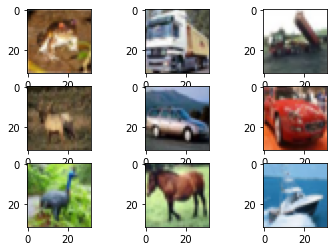

(50000, 32, 32, 3)

In [ ]:
from keras.datasets import cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

## Build and train the model

Build and train your model. 

In [ ]:
# TODO: load the model you selected

# TODO: Transfer learning - build your own model based on the selected model


In [ ]:
# standardisation (we divide by 255 which is the max value for the grayscale images)
X_train_full_norm = X_train_full/255.
X_test_norm = X_test/255. 

In [ ]:
X_test_norm

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

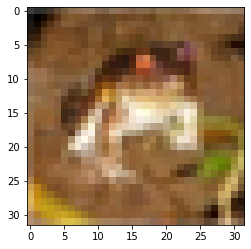

In [ ]:
plt.imshow(X_train_full[0])

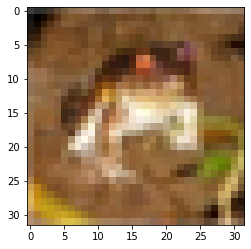

In [ ]:
plt.imshow(X_train_full_norm[0])

In [ ]:
# before normalisation
print(X_train_full[0].min())
print(X_train_full[0].max())

0
255


In [ ]:
#after normalisation
print(X_train_full_norm[0].min())
print(X_train_full_norm[0].max())

0.0
1.0


In [ ]:
type(y_train_full)

numpy.ndarray

In [ ]:
print(y_train_full)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

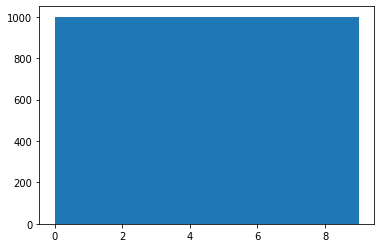

In [ ]:
plt.hist(y_test)

(array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
        5000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

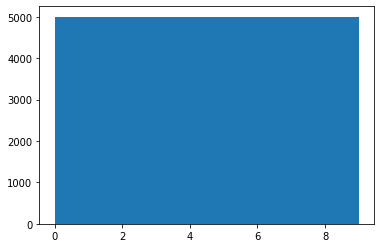

In [ ]:
plt.hist(y_train_full)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import RandomFlip, RandomRotation, RandomZoom, Resizing, RandomTranslation
import pickle

In [ ]:
#### DATA AUGMENTATION 

# data_augmentation = keras.Sequential(
#     [RandomFlip("horizontal"), RandomRotation(0.1)])  

# data_augmentation = keras.Sequential(
#     [RandomFlip("horizontal_and_vertical"), RandomRotation(0.4)])

data_augmentation = keras.Sequential(
    [Resizing(224, 224), RandomFlip("horizontal"), RandomRotation(0.2), RandomTranslation(0.1, 0.1)])

In [ ]:
y_train = np_utils.to_categorical(y_train_full)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full_norm[shuffled_indices[:5000]], X_train_full_norm[shuffled_indices[5000:]]
y_valid, y_train = y_train[shuffled_indices[:5000]], y_train[shuffled_indices[5000:]]

In [ ]:
#download the model
#input_dims = X_train_full_norm.shape[1:]
input_dims = (224, 224, 3)

In [ ]:
input_dims

(224, 224, 3)

In [ ]:
y_train.shape[1]

10

In [ ]:
inner_model=VGG19(input_shape=input_dims, include_top=False, weights='imagenet', classes = y_train.shape[1])


80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
inner_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#create the pipeline and adapt it with dense layers
from keras import Input, Model, Sequential
from keras.layers import Flatten, Dense, Dropout

In [ ]:
#initializer = tf.keras.initializers.GlorotNormal()
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

In [ ]:
#inner_model = inner_model.layers[-5]
from keras.models import Model

layer_name = 'block4_pool'
inner_model= Model(inputs=inner_model.input, outputs=inner_model.get_layer(layer_name).output)


In [ ]:
model = Sequential()
model.add(data_augmentation)
#freeze superior layers of the downloaded model
for layer in inner_model.layers:
  layer.trainable = False 
model.add(inner_model)
model.add(Dropout(0.4)) #réduire overfitting
model.add(Flatten()) #transform last layer => vector
#model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform', input_dim=512))  #leaky_relu, LeakyReLU, 
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_dim=512))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))  #softmax transforms points in proba



In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
#training
history_2=model.fit(X_train, y_train, batch_size=64, epochs=95, validation_data=(X_valid, y_valid))


Epoch 1/95
704/704 [==============================] - 119s 148ms/step - loss: 1.7387 - accuracy: 0.4182 - val_loss: 1.0887 - val_accuracy: 0.6254
Epoch 2/95
704/704 [==============================] - 103s 146ms/step - loss: 1.3871 - accuracy: 0.5185 - val_loss: 0.9731 - val_accuracy: 0.6608
Epoch 3/95
704/704 [==============================] - 103s 146ms/step - loss: 1.2980 - accuracy: 0.5440 - val_loss: 0.9145 - val_accuracy: 0.6818
Epoch 4/95
704/704 [==============================] - 103s 146ms/step - loss: 1.2410 - accuracy: 0.5663 - val_loss: 0.8825 - val_accuracy: 0.6994
Epoch 5/95
704/704 [==============================] - 103s 146ms/step - loss: 1.1913 - accuracy: 0.5810 - val_loss: 0.8798 - val_accuracy: 0.6994
Epoch 6/95
704/704 [==============================] - 103s 146ms/step - loss: 1.1655 - accuracy: 0.5904 - val_loss: 0.8432 - val_accuracy: 0.7068
Epoch 7/95
704/704 [==============================] - 103s 146ms/step - loss: 1.1500 - accuracy: 0.5952 - val_loss: 0.8307 -

In [ ]:
#defreeze les poids et fine tuning (reentrainement)
inner_model.trainable = True
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 model (Functional)          (None, 14, 14, 512)       10585152  
                                                                 
 dropout (Dropout)           (None, 14, 14, 512)       0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                      

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [36]:
history_3=model.fit(X_train, y_train, batch_size=64, epochs=96, validation_data=(X_valid, y_valid)) 
#history_3=model.fit(X_train, y_train, batch_size=64, epochs=2, validation_data=(X_valid, y_valid)) 

Epoch 1/96
704/704 [==============================] - 314s 439ms/step - loss: 1.8491 - accuracy: 0.3344 - val_loss: 1.9138 - val_accuracy: 0.3188
Epoch 2/96
704/704 [==============================] - 308s 438ms/step - loss: 1.4217 - accuracy: 0.4920 - val_loss: 2.6062 - val_accuracy: 0.3136
Epoch 3/96
704/704 [==============================] - 308s 438ms/step - loss: 1.0780 - accuracy: 0.6253 - val_loss: 1.2486 - val_accuracy: 0.6056
Epoch 4/96
704/704 [==============================] - 308s 437ms/step - loss: 0.8253 - accuracy: 0.7151 - val_loss: 0.6015 - val_accuracy: 0.7916
Epoch 5/96
704/704 [==============================] - 308s 438ms/step - loss: 0.7587 - accuracy: 0.7375 - val_loss: 0.5573 - val_accuracy: 0.8052
Epoch 6/96
704/704 [==============================] - 308s 438ms/step - loss: 0.6943 - accuracy: 0.7606 - val_loss: 0.8703 - val_accuracy: 0.7148
Epoch 7/96
704/704 [==============================] - 308s 437ms/step - loss: 0.7399 - accuracy: 0.7447 - val_loss: 0.5569 -

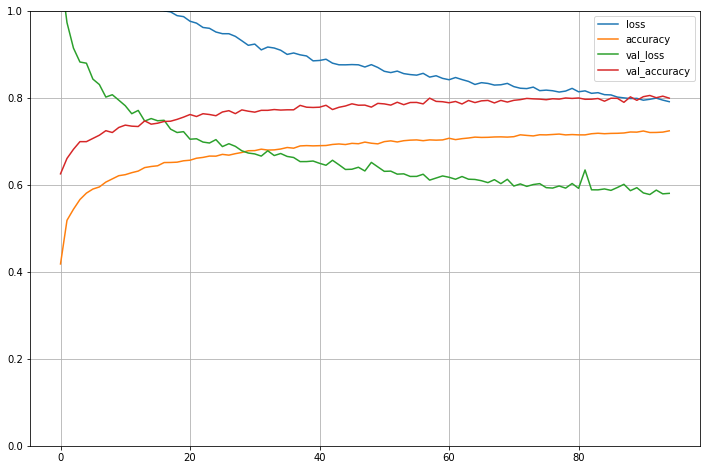

In [37]:
pd.DataFrame(history_2.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

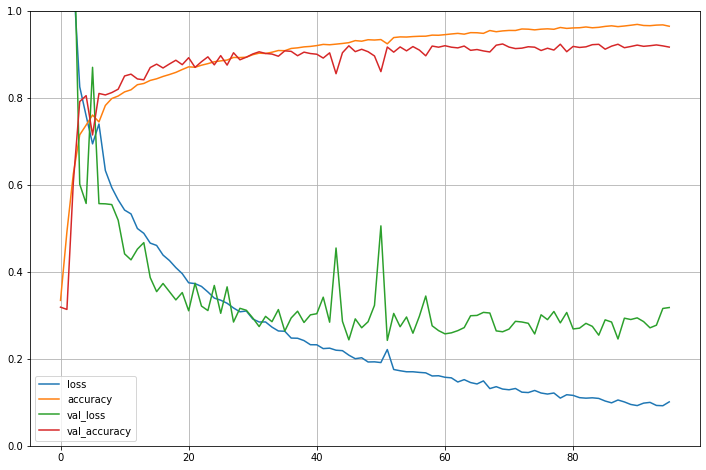

In [38]:
pd.DataFrame(history_3.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [39]:
model.save('FDS21-M102-cifar10.h5') 

## Load the model and evaluate it on the test data

In [40]:
model = keras.models.load_model("FDS21-M102-cifar10.h5")
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 25s 70ms/step - loss: 0.3214 - accuracy: 0.9140


[0.32140105962753296, 0.9139999747276306]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as how you decide the number of layers reused from the selected model, and the difficulties you met.

Transfer learning part
I used vgg19. I tried other models like RESNET50, RESNET101, Xception, Inception... but I did not get very good results. I did some data augmanentation to get more information. Indeed I rotated images, but not too much because the images are quite small and if we rotate too much the image will no longer be relevant and will be bad for training the model. I also flipped the image horizontally and did a little RandomTranslation. 

My model was not too complex, only 3 layers and 3 activation functions. I noticed that adding more layers, activation functions leads to slightly worse results. The first layer was the one with the most neurons, I reduced the number of neurons as I added the number of layers (the number of neurons that I set was always a number to the power of 2, except for the last layer with the softmax function)
I inserted multiple dropout (to reduce overfitting) after each  layer and even one before the flatten (wich is useful to transform a layer into a vector). After each layer I also did batchnormalization.
For kernel initialization I tried he_normal and he_uniform but both lead to similar results.
Furthermore, in order to make the model less complex and avoid overfitting I removed some parmameters and layers in VGG19
A small learning rate of 0.0001 was better than 0.001. Setting the learning rate too low was not a better solution either. 0.0001 seemed to be one of the best learning rate after multiple trials. Doing many epochs (more than 100 in my cases) leads to a better accuracy.
I modified the batch size (between 64 and 512) but It did not make a lot of difference even though it was a bit better for the smallest one. Indeed I reached 0.8750 accuracy with batch size 64

I tried many things to reach 0.90 accuracy, but I have the impression that it is difficult to get more with VGG19. I began to try with RESNET50 but I failed.

Finally I succeeded to get more than 0.90 accuracy. For data_augmentation I used resize(224, 224) and I set input_dim (224, 224, 3). To achieve this result I even did less epochs (less than 100) and I could have even less epochs (for example 60).

Note: I launched it multiple times to be sure about my model and two times I got a little problem. Inddeed during the history three at some point I got a huge val_loss and it had bad repercussions which lead to a slightly worse accuracy. So if this happens when you execute my skeleton, do it multiple times. But most of the time I got more than 0.90 accuracy.
The other bad thing is that it takes a really long time to compile.

I sent you the last model with more than 0.90 accuracy and not the one with 0.875 accuracy because the one with more than 0.90 accuracy rarely had the problem cited above.
